# "Vehicles."

### _"Recognizing vehicle type from its silhouette" (Classification task)._

## Table of Contents




## Part 1: Import, Load Data.

* ### Import libraries

In [3]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')



* ### Read data from ‘.csv’ file

In [7]:
# read data from '.csv' file

data = pd.read_csv('vehicles.csv')
# initialisation of target
target = data['Class']

## Part 2: Exploratory Data Analysis.

* ### Info

In [8]:
# print the full summary of the dataset  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

* ### Head

In [9]:
# preview of the first 5 lines of the loaded data 
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


* ### Describe

In [10]:
data.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


* ### 'Class' attribute value counts and visualisation

In [29]:
# target attribute value counts
target.value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

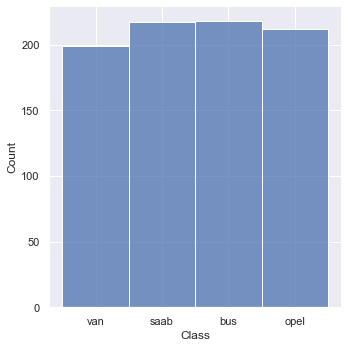

In [30]:
# target attribute visualisation plot
sns.displot(target)

* ### Label encoder for 'Class' attribute

In [31]:
# label encoder for 'Class' attribute
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


* ###  Vizualisation of all attributes

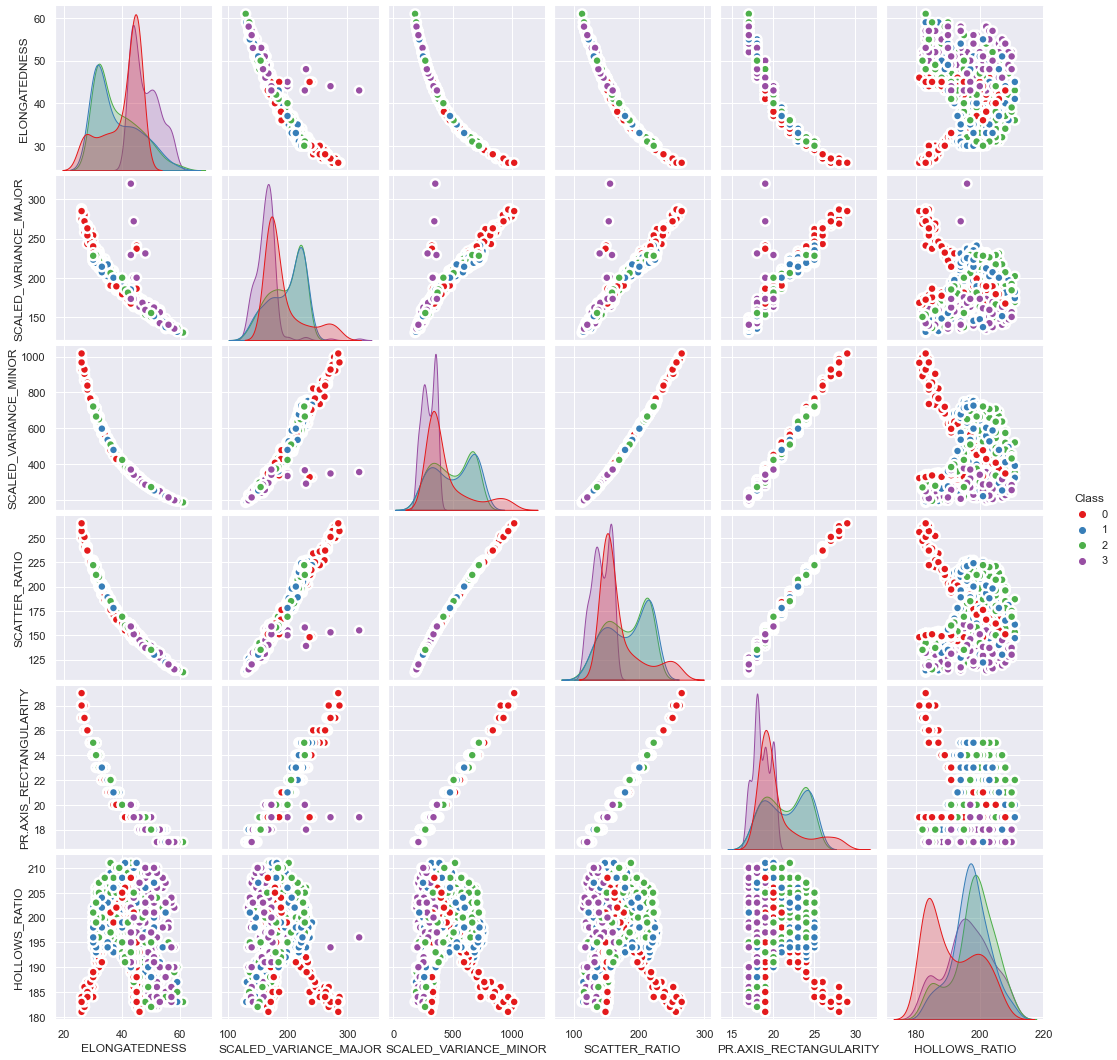

In [32]:
# vizualisation (first part of attributes)
one = ['Class', 'ELONGATEDNESS', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCATTER_RATIO', 'PR.AXIS_RECTANGULARITY', 'HOLLOWS_RATIO']
df1 = data[one]
sns.pairplot(df1, kind="scatter",  hue="Class", palette='Set1', plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

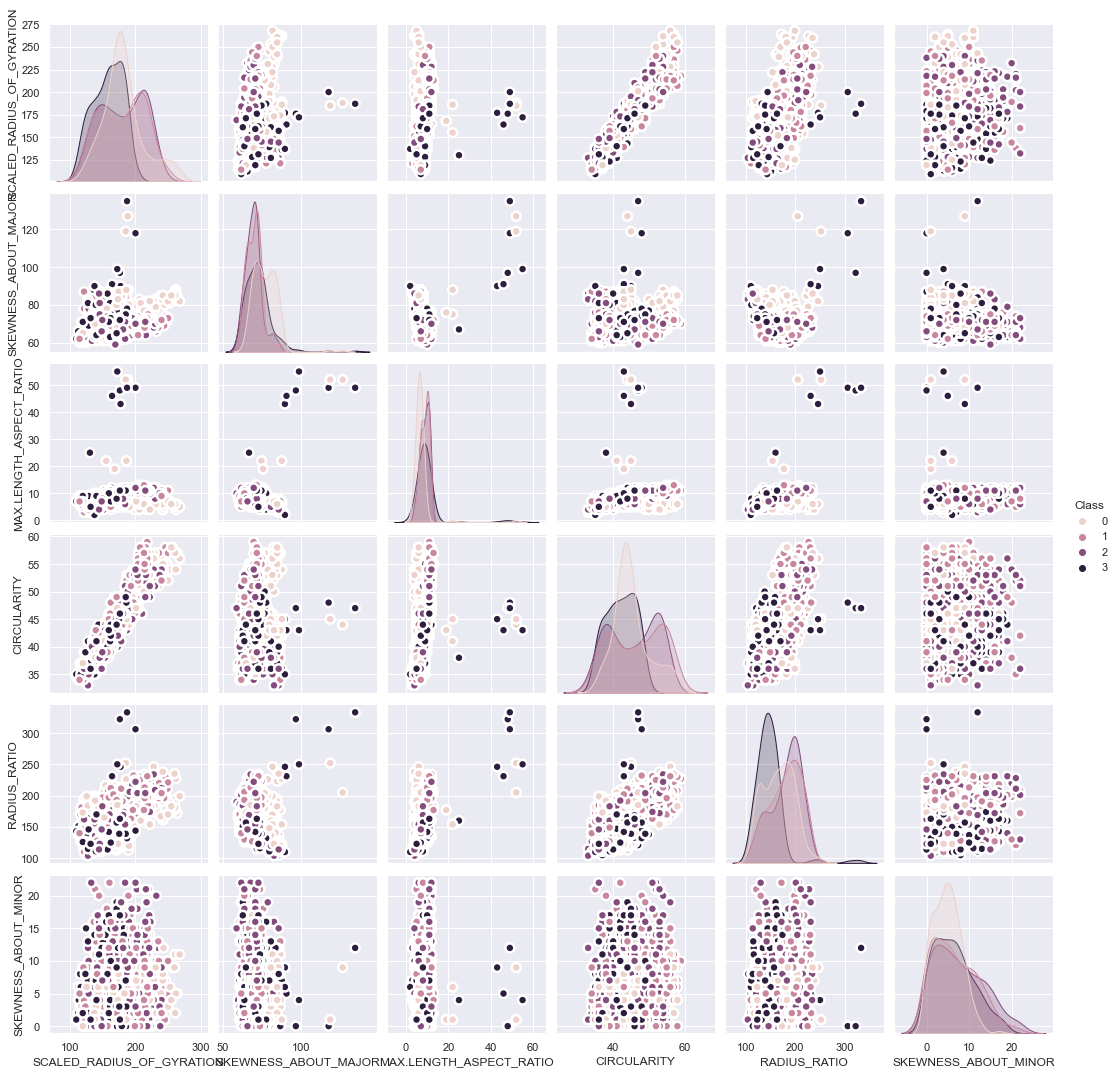

In [26]:
# vizualisation (second part of attributes)
two = ['Class', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'MAX.LENGTH_ASPECT_RATIO', 'CIRCULARITY', 'RADIUS_RATIO', 'SKEWNESS_ABOUT_MINOR']
df2 = data[two]
sns.pairplot(df2, kind="scatter",  hue="Class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

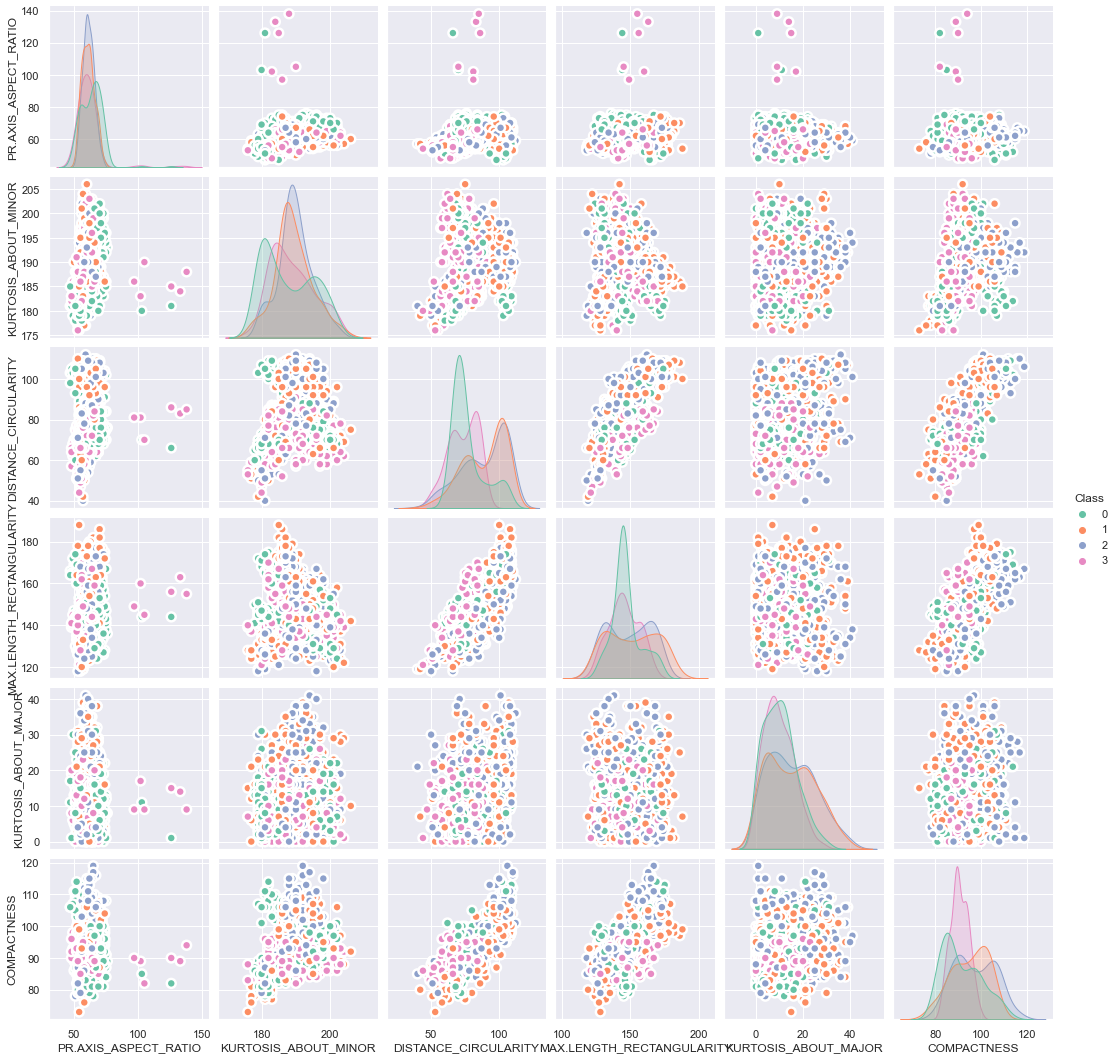

In [34]:
# vizualisation (third part of attributes)
three = ['Class', 'PR.AXIS_ASPECT_RATIO','KURTOSIS_ABOUT_MINOR','DISTANCE_CIRCULARITY','MAX.LENGTH_RECTANGULARITY','KURTOSIS_ABOUT_MAJOR','COMPACTNESS']
df3 = data[three]
sns.pairplot(df3, kind="scatter",  hue="Class", palette='Set2', plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

* ###  Correlation plot of each attribute

<AxesSubplot:>

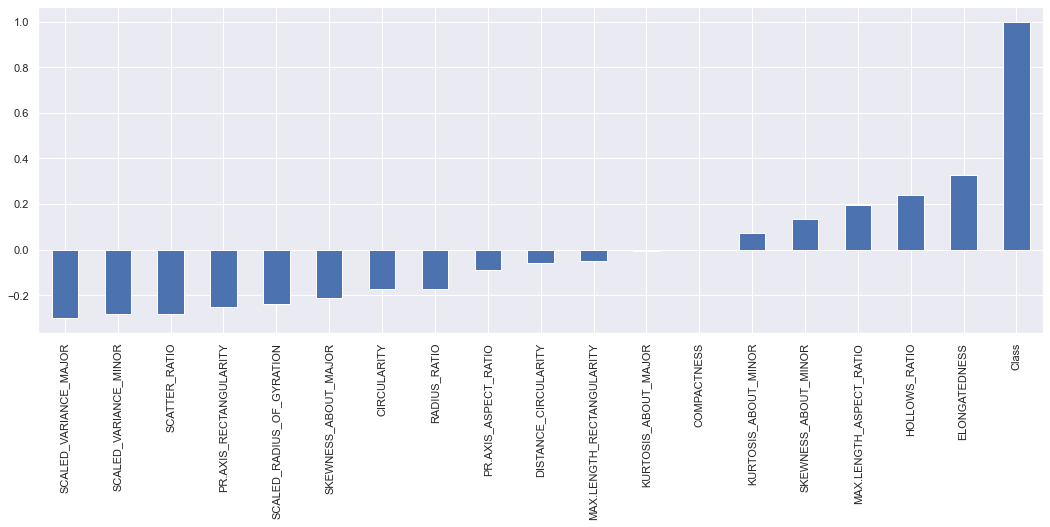

In [40]:
# corelation plot 
data.corr()['Class'].sort_values().plot(kind='bar', figsize=(18,6))

* ###  Correlation list of each attribute

In [41]:
# correlation list
corr = data.corr()
corr_abs = corr.abs()

num_cols = len(data)
num_corr = corr_abs.nlargest(num_cols, 'Class')['Class']
print(num_corr)

Class                        1.000000
ELONGATEDNESS                0.326903
SCALED_VARIANCE_MAJOR        0.300917
SCALED_VARIANCE_MINOR        0.281097
SCATTER_RATIO                0.280903
PR.AXIS_RECTANGULARITY       0.249787
HOLLOWS_RATIO                0.238360
SCALED_RADIUS_OF_GYRATION    0.237618
SKEWNESS_ABOUT_MAJOR         0.210035
MAX.LENGTH_ASPECT_RATIO      0.195172
CIRCULARITY                  0.174246
RADIUS_RATIO                 0.173949
SKEWNESS_ABOUT_MINOR         0.135965
PR.AXIS_ASPECT_RATIO         0.090462
KURTOSIS_ABOUT_MINOR         0.071960
DISTANCE_CIRCULARITY         0.059804
MAX.LENGTH_RECTANGULARITY    0.050632
KURTOSIS_ABOUT_MAJOR         0.005710
COMPACTNESS                  0.000434
Name: Class, dtype: float64


* ### Drop column 'Class'

In [42]:
data = data.drop('Class', axis=1)
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [43]:
# StandardScaler 
sc = StandardScaler()
data_sc = sc.fit_transform(data)
data_sc = pd.DataFrame(data_sc)
data_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


* ### Creating datasets for ML part

In [44]:
# set 'X' for features' and y' for the target ('Class').
X = data_sc.copy()
y = target

* ### 'Train\Test' split

In [45]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.24, random_state=0)

In [46]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((642, 18), (642,))

In [47]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((204, 18), (204,))

## Part 4: Machine Learning.

* ### Build, train and evaluate model

* SVC model

In [48]:
svc_classifier = SVC(kernel='linear', decision_function_shape='ovo', tol=.03)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)
accuracy = accuracy_score(svc_pred, y_test)
print('Accuracy of SVC is:', accuracy)

Accuracy of SVC is: 0.8088235294117647


* ### Classification report

In [50]:
print('SVC prediction report\n', classification_report(y_test, svc_pred, digits=6))

SVC prediction report
               precision    recall  f1-score   support

         bus   0.901961  1.000000  0.948454        46
        opel   0.653061  0.666667  0.659794        48
        saab   0.727273  0.634921  0.677966        63
         van   0.959184  1.000000  0.979167        47

    accuracy                       0.808824       204
   macro avg   0.810370  0.825397  0.816345       204
weighted avg   0.802632  0.808824  0.804077       204



* ### Confusion matrix

SVC confusion matrix
 [[46  0  0  0]
 [ 0 32 15  1]
 [ 5 17 40  1]
 [ 0  0  0 47]]


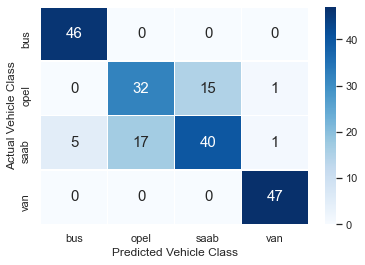

In [60]:
# confusion matrix of SVC model
labels = ['bus', 'opel', 'saab', 'van']
cm = confusion_matrix(y_test, svc_pred)
print('SVC confusion matrix\n', cm)

#Matrix
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={'size': 15})
plt.ylabel('Actual Vehicle Class')
plt.xlabel('Predicted Vehicle Class')
plt.show()

* ### Misclassification plot

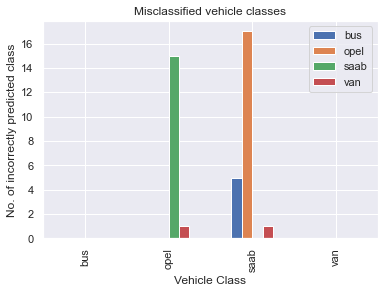

In [65]:
# misclassification vehicle plot 
for label in df_cm.columns:
    df_cm.at[label, label]=0

ax = df_cm.plot(kind='bar', title='Misclassified vehicle classes')
ax.set_xlabel('Vehicle Class')
ax.set_ylabel('No. of incorrectly predicted class')
plt.show()

* ### Comparison table between Actual 'Class' and Predicted 'Class'

In [66]:
# comparison table between Actual 'Class' and Predicted 'Class'
act_vs_pred = pd.DataFrame({'Actual Vehicle Class':y_test, 'SVC Predicted Vehicle Class:': svc_pred})
act_vs_pred.head(10)

,Actual Vehicle Class,SVC Predicted Vehicle Class:
506,saab,opel
222,bus,bus
612,opel,van
730,opel,opel
661,saab,saab
577,opel,saab
31,saab,van
145,opel,opel
794,bus,bus
416,bus,bus


##  Conclusion.

In [67]:
# submission of .csv file with test predictions
submission = pd.DataFrame()
submission['ID'] = X_test.index
submission['Class'] = svc_pred
submission.to_csv('VehiclesPredTest.csv', index=False)